In [1]:
#pip install imblearn

In [71]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif

from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE #for balanced
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from scipy.stats import pearsonr
import itertools

# For reproducibility of results
np.random.seed(0)

# Load the dataset
file_path = "rtfDataSet.csv"
original_data = pd.read_csv(file_path)

# Display first few rows of the original dataset
original_data.head()

0      1      2      3      4      5      6      7      8      9  ...  \
0 -0.536  0.292 -0.684  0.123 -0.118  0.346 -0.308 -0.113  0.401 -0.399  ...   
1 -0.496 -0.298 -0.529  0.073 -0.072  0.107 -0.316 -0.066 -0.168 -0.099  ...   
2  0.008 -0.031 -0.240  0.178 -0.120  0.317 -0.481  0.031 -0.077  0.063  ...   
3 -0.188 -0.180 -0.062 -0.104 -0.136 -0.061 -0.216 -0.143  0.068 -0.189  ...   
4  0.038  0.155 -0.203 -0.088 -0.084 -0.164 -0.145 -0.168  0.008  0.143  ...   

      61     62     63     64     65     66     67     68     69  label  
0 -0.135 -0.063 -0.410 -0.223 -0.599 -0.136 -0.329 -0.132 -0.266      0  
1  0.189  0.007 -0.362 -0.151 -0.338 -0.031 -0.159 -0.097 -0.131      0  
2 -0.035  0.101 -0.098 -0.172 -0.290  0.033 -0.342 -0.321 -0.238      0  
3  0.146 -0.145 -0.527 -0.292 -0.663 -0.078 -0.194 -0.151 -0.268      0  
4  0.019 -0.084  0.164 -0.165 -0.126 -0.112  0.029 -0.138  0.148      1  

[5 rows x 71 columns]

In [72]:
# Normalizing the data using Min-Max scaling
scaler = MinMaxScaler()
normalized_data = pd.DataFrame(scaler.fit_transform(original_data.iloc[:,:-1]), columns=original_data.columns[:-1]) # Normalize all data except for the last column (label)
normalized_data['label'] = original_data['label']

save_csv = 'normalized_dataset.csv'
normalized_data.to_csv(save_csv, index=False)

# # argmax and argmin of normalized_data
# normalized_data.idxmax(), normalized_data.idxmin()
# normalized_data['label'][198]

normalized_data.head()

0         1         2         3         4         5         6  \
0  0.294244  0.705043  0.183047  0.610883  0.287570  0.806475  0.179009   
1  0.315761  0.143673  0.263651  0.559548  0.330241  0.630611  0.174344   
2  0.586875  0.397716  0.413937  0.667351  0.285714  0.785136  0.078134   
3  0.481442  0.255947  0.506500  0.377823  0.270872  0.506990  0.232653   
4  0.603012  0.574691  0.433177  0.394251  0.319109  0.431199  0.274052   

          7         8         9  ...        61        62        63        64  \
0  0.499009  0.890763  0.184259  ...  0.378264  0.459459  0.300824  0.339323   
1  0.522299  0.433735  0.462037  ...  0.606916  0.529530  0.333791  0.389081   
2  0.570367  0.506827  0.612037  ...  0.448836  0.623624  0.515110  0.374568   
3  0.484143  0.623293  0.378704  ...  0.576570  0.377377  0.220467  0.291638   
4  0.471754  0.575100  0.686111  ...  0.486944  0.438438  0.695055  0.379406   

         65        66        67        68        69  label  
0  0.180758  0.348815  0.324151  0.526825  0.128294      0  
1  0.332945  0.448341  0.433056  0.543741  0.221914      0  
2  0.360933  0.509005  0.315823  0.435476  0.147712      0  
3  0.143440  0.403791  0.410634  0.517641  0.126907      0  
4  0.456560  0.371564  0.553491  0.523925  0.415395      1  

[5 rows x 71 columns]

In [73]:
# Load the normalized dataset (This can be adjusted to the working dataset in case there is some matching problems)
file_path = 'normalized_dataset.csv'
data = pd.read_csv(file_path)

In [74]:
def sort_normalized_data_by_column(normalized_data, column_index):
    # Sort the normalized dataset by the specified column index in ascending order
    sorted_data = normalized_data.sort_values(by=normalized_data.columns[column_index])

    # Return the sorted dataset
    return sorted_data
sorted_data = sort_normalized_data_by_column(normalized_data, 3)

sorted_data.head()

0         1         2         3         4         5         6  \
178  0.895643  0.642245  0.252210  0.000000  0.496289  0.445180  0.148688   
292  0.495428  0.344434  0.236089  0.089322  0.257885  0.265636  0.809913   
122  0.354492  0.407231  0.166407  0.104723  0.102968  0.615894  0.414577   
190  0.538462  0.384396  0.234529  0.108830  0.417440  0.721854  0.023907   
167  0.788596  0.486204  0.291212  0.163244  0.635436  0.208241  0.367930   

            7         8         9  ...        61        62        63  \
178  0.395441  0.854618  0.845370  ...  0.365561  0.211211  1.000000   
292  0.450446  0.481928  0.149074  ...  0.738885  0.335335  0.256181   
122  0.358771  0.595181  0.203704  ...  0.426253  0.601602  0.000000   
190  0.661546  0.675502  0.000000  ...  0.260409  0.424424  0.345467   
167  0.742815  0.541365  1.000000  ...  0.305575  0.121121  0.735577   

           64        65        66        67        68        69  label  
178  0.904630  0.806414  0.424645  0.599616  0.649106  0.117892      0  
292  0.310297  0.235569  0.589573  0.194106  0.265829  0.229542      1  
122  0.230131  0.000000  0.473934  0.254965  0.313195  0.024272      0  
190  0.266068  0.096793  0.588626  0.106983  0.610440  0.431345      0  
167  0.700069  0.648397  0.480569  0.592569  0.370710  0.236477      0  

[5 rows x 71 columns]

In [75]:
# Assuming we have a 'ranking_column' in the dataset
# Sort the values in the ranking column in descending order
#original_data.sort_values(by='ranking_column', ascending=False, inplace=True)

In [76]:
# Separate the features (X) and labels (y)
x = data.drop(columns=['label'])
y = data['label']

# Apply SMOTE to balance the dataset // Great job using a seed
smote = SMOTE(random_state=42) 
x_balanced, y_balanced = smote.fit_resample(x, y)

# Calculate the Pearson correlation coefficient for all pairs of features
corr_matrix = np.abs(np.corrcoef(x_balanced, rowvar=False))

# Define a threshold for removing duplicates
corr_threshold = 0.7  # Adjust this threshold as needed

# Create a list of unique feature pairs with a correlation above the threshold
feature_pairs_to_remove = []
for i, j in itertools.combinations(range(len(x.columns)), 2):
    if corr_matrix[i, j] > corr_threshold:
        feature_pairs_to_remove.append((x.columns[i], x.columns[j]))

# Standardize the features
scaler = StandardScaler()
x_balanced = scaler.fit_transform(x_balanced)

print(y_balanced.shape)

(404,)


In [77]:
# Define the number of iterations for Simulated Annealing
n_iterations = 2000

# Initialize the best solution and its score
best_solution = None
best_score = 0

# Initialize the current solution and its score
current_solution = pd.DataFrame(x_balanced, columns=x.columns)  # Use the balanced dataset
current_score = 0

# Define an initial temperature and cooling rate
T_initial = 4.0  # Initial temperature
alpha = 0.95  # Cooling rate

# Define a small constant to avoid division by zero in the SU function
epsilon = 1e-10

# Symmetrical Uncertainty function
def symmetrical_uncertainty(x, y, epsilon):
    mi = mutual_info_classif(x, y)
    h_x = -np.sum(np.log2((x.sum() + epsilon) / (x.sum().sum() + epsilon)))
    su = 2 * np.sum(mi) / h_x
    return su


In [78]:
# Initialize a list to store the importance scores for each subset
subset_importance_scores = []

# Feature selection pipeline
def feature_selection_pipeline(data, target, n_subsets=10, correlation_threshold=0.7):
    # Step 1: Calculate the Pearson correlation matrix
    correlation_matrix = data.corr()

    # Step 2: Create the first subset based on Pearson correlation
    subset_1 = []
    remaining_features = data.columns.tolist()

    while len(remaining_features) > 0:
        current_feature = remaining_features[0]
        subset_1.append(current_feature)

        # Find correlated features and remove them
        correlated_features = [current_feature]
        for feature in remaining_features[1:]:
            if abs(correlation_matrix[current_feature][feature]) > correlation_threshold:
                correlated_features.append(feature)

        remaining_features = [feature for feature in remaining_features if feature not in correlated_features]

    subsets = [subset_1]
     # Step 3 and 4: Calculate SU scores and create the remaining subsets
    for i in range(2, n_subsets + 1):
        # Calculate SU scores for the remaining features
        su_scores = []
        for feature in remaining_features:
            su = symmetrical_uncertainty(data[subset_1], data[feature], epsilon)
            su_scores.append((feature, su))

        # Sort features by SU score in descending order
        if su_scores:
            # Keep a few features with high SU scores and remove redundant ones
            subset_i = [su_scores[0][0]]
            remaining_features = [feature for feature, _ in su_scores[1:]]
            subsets.append(subset_i)
        else:
            # If there are no more features with high SU scores, exit the loop
            break

    return subsets

# Generate 10 feature subsets using tyhe feature selection pipeline
subsets = feature_selection_pipeline(pd.DataFrame(x_balanced, columns=x.columns), y_balanced, n_subsets=10, correlation_threshold=0.7)



# Simulated Annealing loop (this code could be improved)
for iteration in range(n_iterations):
    # Make a small random change to the current solution (feature selection)
    feature_to_change = np.random.choice(current_solution.columns)
    current_solution[feature_to_change] = np.random.choice([0, 1])
    
    # Calculate the Symmetrical Uncertainty score for the current solution
    current_score = symmetrical_uncertainty(current_solution, y_balanced, epsilon=epsilon)
    
    # Calculate the change in score
    delta_score = current_score - best_score
    
    # Accept the new solution with a certain probability based on the temperature
    if delta_score > 0 or np.random.uniform() < np.exp(delta_score / T_initial):
        best_solution = current_solution.copy()
        best_score = current_score
    
    # Update the temperature using the cooling rate
    T_initial *= alpha
    
    # Calculate the importance of the selected features in the current solution
    selected_features = current_solution.columns[current_solution.sum() > 0]
    importance_per_capita = current_score / len(selected_features)
    subset_importance_scores.append(importance_per_capita)

Selected Features:
Index(['0', '4', '5', '8', '10', '11', '12', '15', '16', '17', '19', '20',
       '21', '22', '24', '25', '27', '28', '30', '31', '32', '33', '34', '36',
       '37', '38', '40', '43', '45', '46', '47', '48', '49', '50', '52', '53',
       '58', '63', '65', '66', '67', '68'],
      dtype='object')
Symmetrical Uncertainty Score: 0.0012900603754321133
Importance Per Capita: 3.071572322457413e-05


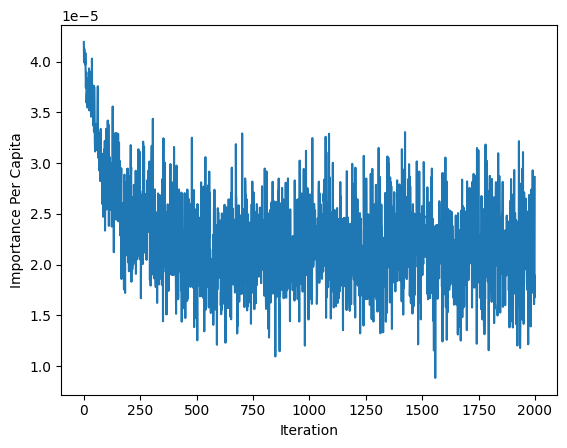


Generated Feature Subsets:
Subset 1: ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '13', '14', '15', '17', '18', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '51', '52', '53', '55', '56', '57', '58', '60', '61', '62', '64', '66', '67', '68', '69']


In [79]:
# Print the selected features and their Symmetrical Uncertainty score
selected_features = best_solution.columns[best_solution.sum() > 0]
print("Selected Features:")
print(selected_features)
print("Symmetrical Uncertainty Score:", best_score)

# Calculate the importance per capita for the best solution
best_importance_per_capita = best_score / len(selected_features)
print("Importance Per Capita:", best_importance_per_capita)

# Plot the importance scores over iterations (optional)
import matplotlib.pyplot as plt
plt.plot(range(n_iterations), subset_importance_scores)
plt.xlabel("Iteration")
plt.ylabel("Importance Per Capita")
plt.show()

# Print the generated subsets
print("\nGenerated Feature Subsets:")
for i, subset in enumerate(subsets):
    print(f"Subset {i + 1}: {subset}")


In [80]:
# TODO: 3. Top Five Feature Subsets

# Use the feature selection method to identify the top five feature subsets
# Calculate the per capita importance for each subset

# Initialize a list to store the importance scores for each subset
top_feature_subsets = []
top_importance_scores = []

for iteration in range(n_iterations):
    # Make a small random change to the current solution (feature selection)
    feature_to_change = np.random.choice(current_solution.columns)
    current_solution[feature_to_change] = np.random.choice([0, 1])
    
    # Calculate the Symmetrical Uncertainty score for the current solution
    current_score = symmetrical_uncertainty(current_solution, y_balanced, epsilon=epsilon)
    
    # Calculate the change in score
    delta_score = current_score - best_score
    
    # Accept the new solution with a certain probability based on the temperature
    if delta_score > 0 or np.random.uniform() < np.exp(delta_score / T_initial):
        best_solution = current_solution.copy()
        best_score = current_score
    
    # Update the temperature using the cooling rate
    T_initial *= alpha
    # Calculate the importance of the selected features in the current solution
    selected_features = current_solution.columns[current_solution.sum() > 0]
    importance_per_capita = current_score / len(selected_features)

    # Check if the current solution is one of the top five by comparing importance scores
    if len(top_feature_subsets) < 5:
        top_feature_subsets.append(selected_features)
        top_importance_scores.append(importance_per_capita)
    else:
        # Find the index of the feature subset with the lowest importance score in the top five
        min_score_index = np.argmin(top_importance_scores)
        
        # If the current solution has a higher importance score than the lowest in the top five, replace it
        if importance_per_capita > top_importance_scores[min_score_index]:
            top_feature_subsets[min_score_index] = selected_features
            top_importance_scores[min_score_index] = importance_per_capita

# Print the top five feature subsets and their importance scores
for i, (subset, importance_score) in enumerate(zip(top_feature_subsets, top_importance_scores), 1):
    print(f"Top {i} Feature Subset:")
    print(subset)
    print("Importance Per Capita:", importance_score)
    print("\n")

Top 1 Feature Subset:
Index(['11', '12', '14', '17', '19', '20', '24', '25', '26', '28', '31', '33',
       '38', '39', '43', '45', '48', '49', '54', '58', '60', '64', '66'],
      dtype='object')
Importance Per Capita: 4.1631528065883496e-05


Top 2 Feature Subset:
Index(['3', '4', '6', '7', '10', '15', '16', '18', '19', '20', '21', '23',
       '24', '28', '33', '39', '44', '48', '50', '51', '52', '55', '56', '58',
       '62', '64', '67'],
      dtype='object')
Importance Per Capita: 4.2757416268085015e-05


Top 3 Feature Subset:
Index(['0', '1', '2', '3', '9', '10', '11', '12', '17', '22', '23', '25', '31',
       '32', '33', '36', '37', '39', '42', '44', '48', '53', '57', '59', '60',
       '62', '64', '66', '69'],
      dtype='object')
Importance Per Capita: 4.1875800850499755e-05


Top 4 Feature Subset:
Index(['1', '3', '7', '12', '14', '22', '25', '26', '28', '37', '40', '42',
       '44', '46', '48', '53', '58', '59', '60', '66', '68', '69'],
      dtype='object')
Importance P

In [82]:

# TODO: 4. AUC Score-based Ranking

# Use a classification model (e.g., logistic regression, SVM, etc.) to evaluate the feature subsets
# Rank the top five feature subsets based on their AUC scores


subset_models_lr = []
subset_models_svm = []
auc_scores_lr = []
auc_scores_svm = []


for i, (subset_features, subset_score) in enumerate(top_feature_subsets):
    
    list_features_subset = subset_features.tolist()    

    list_features_subset_int = [eval(i) for i in list_features_subset]
    
    
    subset_x = [current_solution.iloc[:,list_features_subset_int]]
    x_model = np.array(subset_x)
    x_model_fit = np.squeeze(x_model)
    #print(subset_x)
    #print("\n\n\n\n\n")
    y_model = np.array(y_balanced)
    
    x_train, x_test, y_train, y_test = train_test_split(x_model_fit, y_model, test_size = 0.30, random_state=42)
    
    model = LogisticRegression(penalty='l2', solver='liblinear')
    model.fit(x_train, y_train)
    
    y_pred_prob = model.predict_proba(x_test)[:,1]
    auc = roc_auc_score(y_test, y_pred_prob)
    
    subset_models_lr.append(model)
    auc_scores_lr.append([i, auc])
    
    model2 = svm.SVC(kernel='poly',probability=True)
    model2.fit(x_train, y_train)
    
    y_pred_prob2 = model2.predict_proba(x_test)[:,1]
    auc2 = roc_auc_score(y_test, y_pred_prob2)
    
    subset_models_svm.append(model2)
    auc_scores_svm.append([i, auc2])
    
    
print("\nLR")    

sorted_auc_scores = sorted(auc_scores_lr, key=lambda x: x[1], reverse=True)
sorted_auc_scores2 = sorted(auc_scores_svm, key=lambda x: x[1], reverse=True)


for i, (subset_number, subset_auc_score) in enumerate(sorted_auc_scores):
    print(f"Subset {subset_number}: {subset_auc_score}")

print("SVM\n\n")

for i, (subset_number, subset_auc_score) in enumerate(sorted_auc_scores2):
    print(f"Subset {subset_number}: {subset_auc_score}")

      
      

ValueError: too many values to unpack (expected 2)

In [96]:

# TODO: 5. Interpretation and Conclusion

# Interpret the per capita importance and the AUC scores
# Conclude the study, noting any limitations and suggesting future work